# Imports

In [27]:
import sys
import imp
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import spearmanr,pearsonr,ttest_1samp, ttest_ind
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
sys.path.append('../data_processing_code/')
sys.path.append('.')

import get_data
imp.reload(get_data)
from get_data import get_data, get_data_online

import plotting
imp.reload(plotting)
from plotting import *


# Specs

In [29]:
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'font.family': 'normal'})

# x,y label size
labelsize =10
ticklabelsize=8
legendsize=8

# Figure 2 (a)

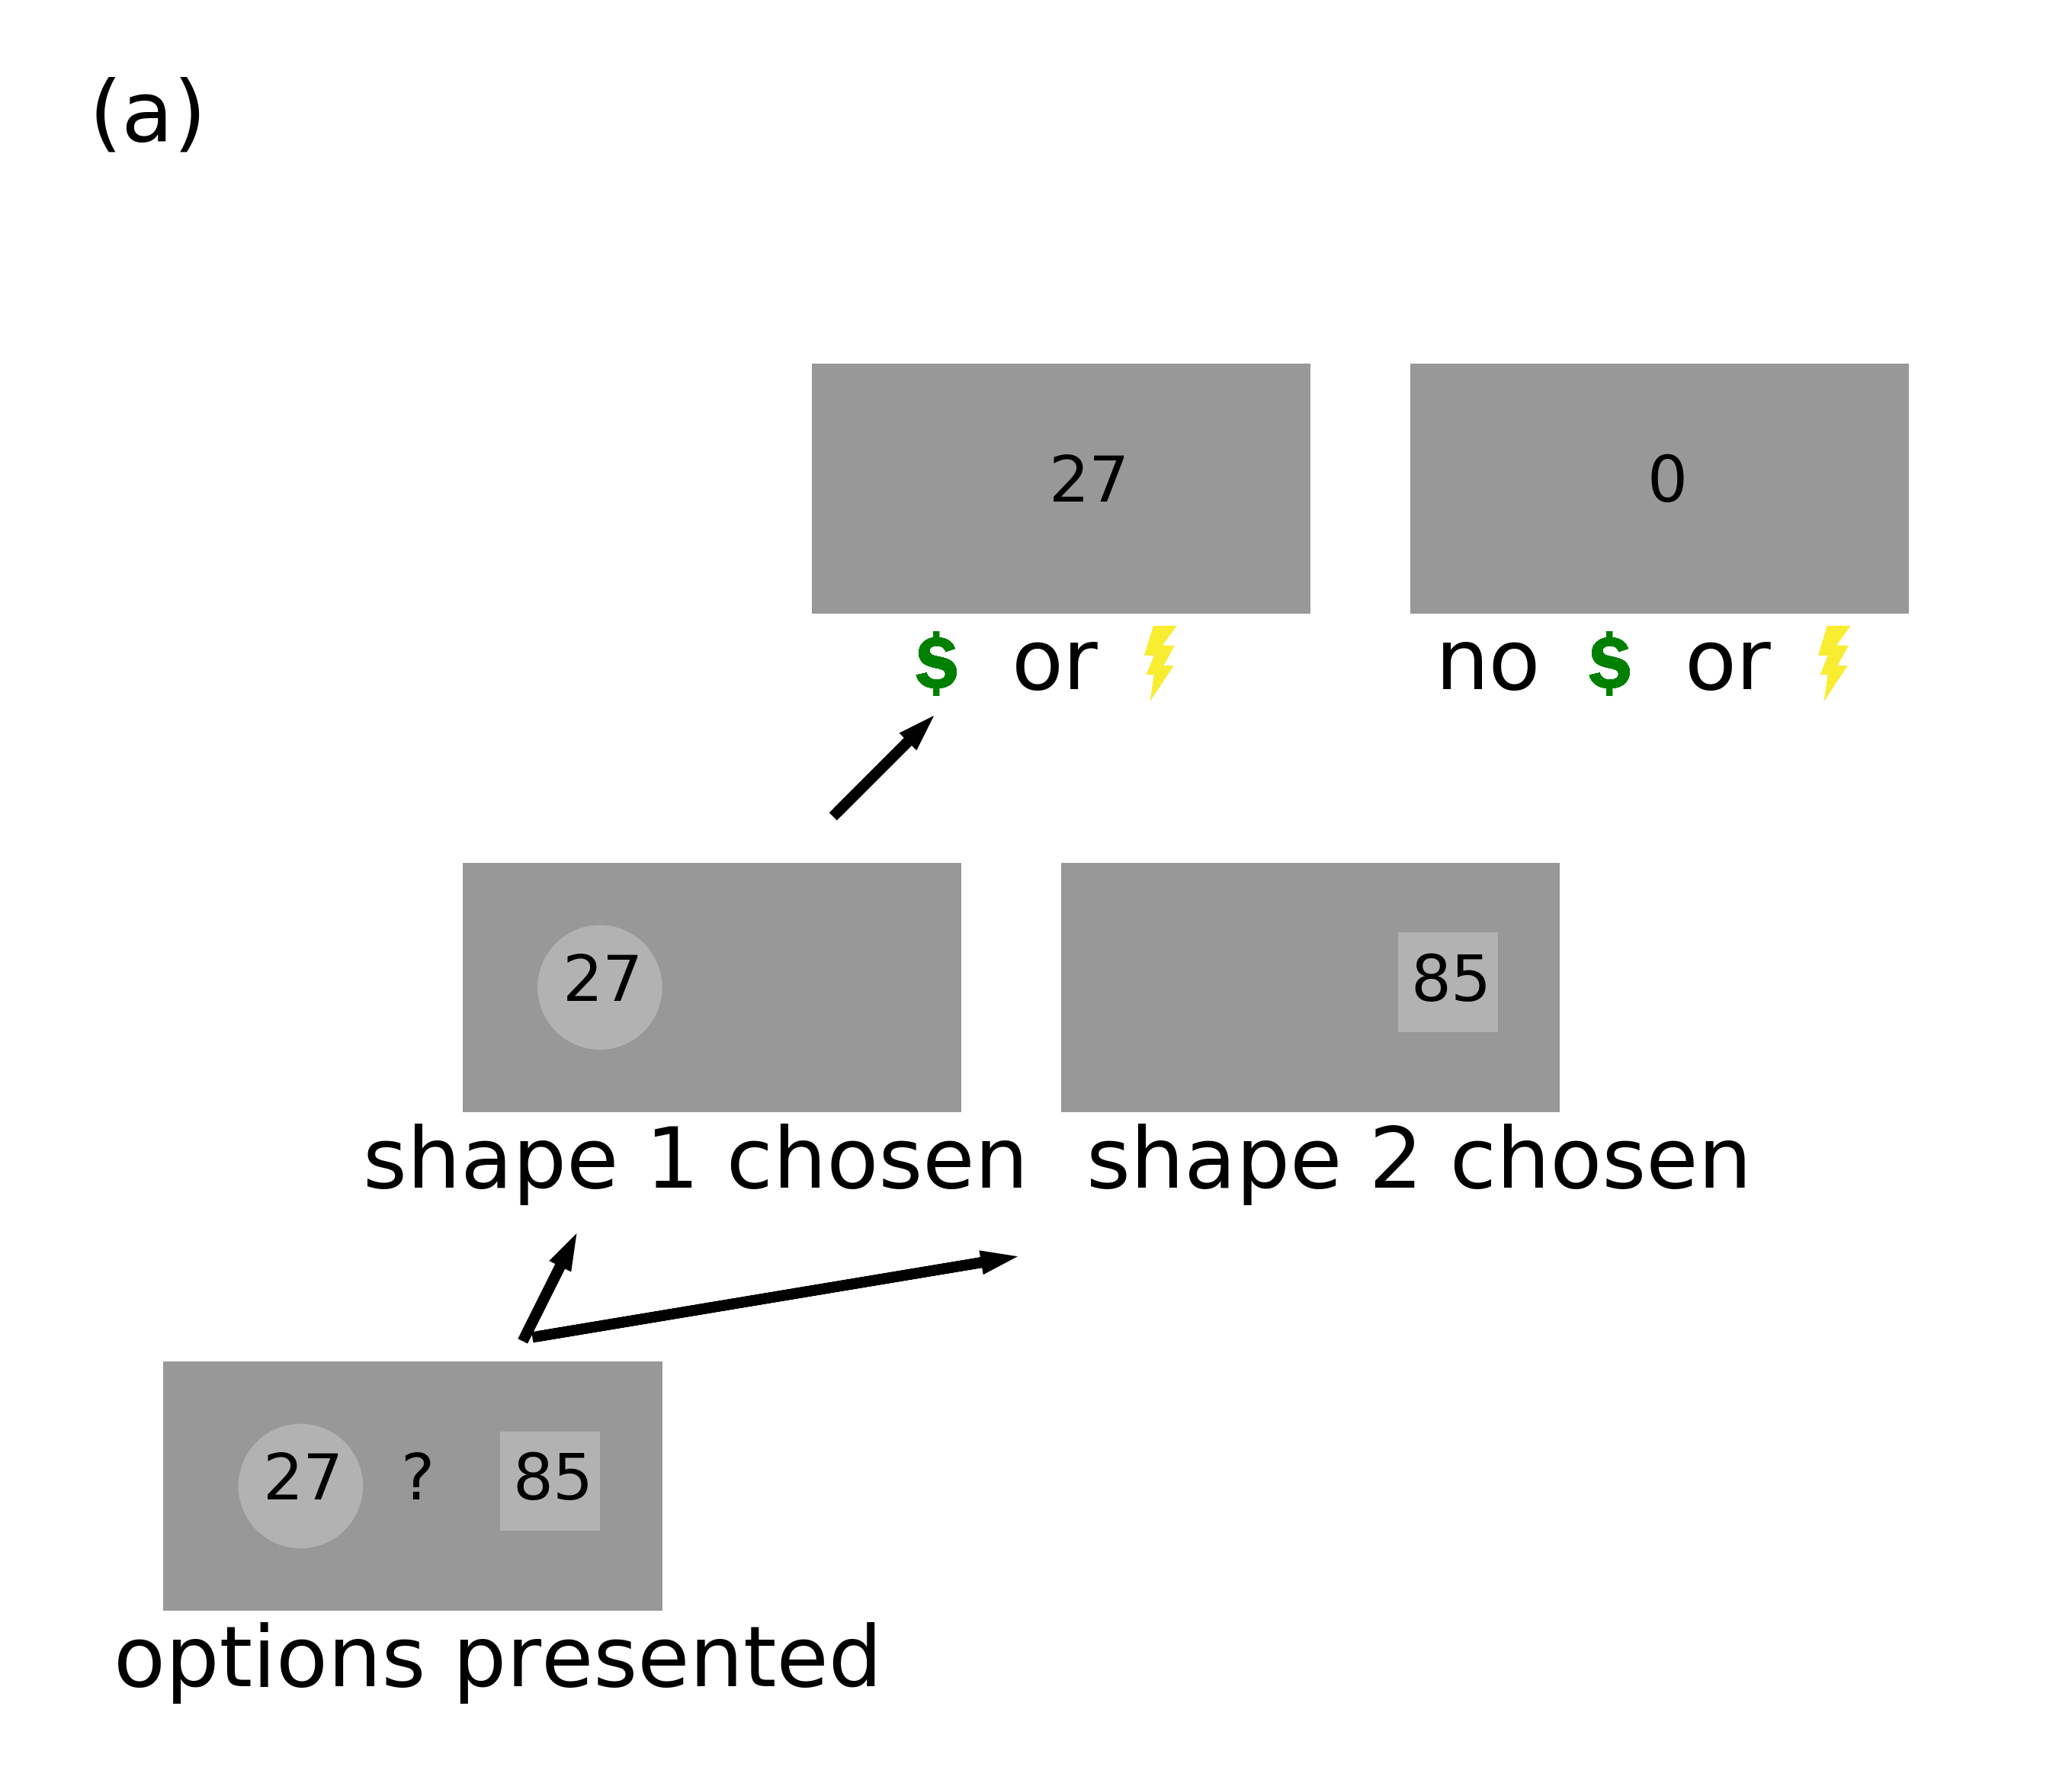

In [30]:
plt.figure(figsize=(6.5/2,2.5),dpi=1000)
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

fontsize=8
magsize=6

Ml = 27
Mr = 85

im_lightening = mpimg.imread('lightning-bolt.png')
im_dollar = mpimg.imread('dollar_sign.png')

left_texts = ['options presented',
             "choice",
             'outcome delivery ']
right_texts = ['Jittered [min=1s, mean=2s](in-lab)\nFixed 1s (online)',
             "Jittered [min=2s, mean=4s](in-lab)\nFixed 1s (online)",
             'Fixed 2s (in-lab)\nFixed 1.5s (online)']
centers =['X','?','X','X']
centers =['?','X','X']
ax = plt.gca()
for i,(left_text,right_text,center) in enumerate(zip(left_texts,right_texts,centers)):

    
    xo = i*1.4
    yo = i*2+0.5
    
    xo1 = -0.2 # shift left 
    xo2 = 2.2 # shift right 
    if i==0:
        ax.add_patch(plt.Rectangle((xo,yo), 2, 1, fc='0.2',alpha=0.5))
        shape_A = plt.Circle((xo+.55, yo+0.5), radius=0.25, fc='0.8',alpha=0.5)
        shape_B = plt.Rectangle((xo+1.35, yo+0.32), 0.40, 0.40, fc='0.8',alpha=0.5)
        plt.gca().add_patch(shape_A)
        plt.gca().add_patch(shape_B)
        plt.text(xo+0.4,yo+0.45,Ml,fontsize=magsize)
        plt.text(xo+1.4,yo+0.45,Mr,fontsize=magsize)
        plt.text(xo+0.95,yo+0.45,center,fontsize=magsize)
        plt.text(xo-0.2,yo-0.3,'options presented',fontsize=fontsize)
        
    elif i==1:
        
        # add squares
        ax.add_patch(plt.Rectangle((xo+xo1,yo), 2, 1, fc='0.2',alpha=0.5))
        ax.add_patch(plt.Rectangle((xo+xo2,yo), 2, 1, fc='0.2',alpha=0.5))
    
        # add circle square left and right 
        
        # left 
        shape_A = plt.Circle((xo+xo1+0.55, yo+0.5), radius=0.25, fc='0.8',alpha=0.5)
        plt.gca().add_patch(shape_A)
        plt.text(xo+xo1+0.4,yo+0.45,Ml,fontsize=magsize)
        plt.text(xo+xo1-0.4,yo-0.3,'shape 1 chosen',fontsize=fontsize)  
        plt.arrow(1.45, 1.6, .15, .3,head_width=.04,fc='k')

        # right
        shape_B = plt.Rectangle((xo+xo2+1.35, yo+0.32), 0.40, 0.40, fc='0.8',alpha=0.5)
        plt.gca().add_patch(shape_B)
        plt.text(xo+xo2+1.4,yo+0.45,Mr,fontsize=magsize)
        plt.text(xo+xo2+0.1,yo-0.3,'shape 2 chosen',fontsize=fontsize)  
        plt.arrow(1.5, 1.6, 1.8, .3,head_width=.04,fc='k')
        
    elif i==2:
        
        # add squares
        ax.add_patch(plt.Rectangle((xo+xo1,yo), 2, 1, fc='0.2',alpha=0.5))
        ax.add_patch(plt.Rectangle((xo+xo2,yo), 2, 1, fc='0.2',alpha=0.5))
    
        # add circle square left and right 
        
        ## left ## 
        plt.text(xo+xo1+0.95,yo+0.45,str(Ml),fontsize=magsize)
    
        # Dollar sign or shock 
        imagebox2 = OffsetImage(im_dollar, zoom=0.012)
        ab = AnnotationBbox(imagebox2, (xo+xo1+0.5,yo-0.2),pad=0.0,frameon=False)
        ax.add_artist(ab)

        plt.text(xo+xo1+0.8,yo-0.3,'or',fontsize=fontsize)
        
        imagebox1 = OffsetImage(im_lightening, zoom=0.012)
        ab = AnnotationBbox(imagebox1, (xo+xo1+1.4,yo-0.2),pad=0.0,frameon=False)
        ax.add_artist(ab)
        

        plt.arrow(2.7, 3.7, .3, .3,head_width=.04,fc='k')
        
        
        ## right ##

        plt.text(xo+xo2+0.95,yo+0.45,0,fontsize=magsize)
        plt.text(xo+xo2+0.1,yo-0.3,'no',fontsize=fontsize)
        
        # Dollar sign or shock 
        imagebox2 = OffsetImage(im_dollar, zoom=0.012)
        ab = AnnotationBbox(imagebox2, (xo+xo2+0.8,yo-0.2),pad=0.0,frameon=False)
        ax.add_artist(ab)

        plt.text(xo+xo2+1.1,yo-0.3,'or',fontsize=fontsize)
        
        imagebox1 = OffsetImage(im_lightening, zoom=0.012)
        ab = AnnotationBbox(imagebox1, (xo+xo2+1.7,yo-0.2),pad=0.0,frameon=False)
        ax.add_artist(ab)
        
    
    plt.axis('equal')

    plt.xticks([])
    plt.yticks([])
    plt.draw()
plt.text(-0.3,6.4,'(a)',fontsize=8)
sns.despine(left='false',right='false',bottom='false')
plt.savefig('../figures/figure_2_parta.png')#,bbox_inches='tight')

# Figure 2 (b)

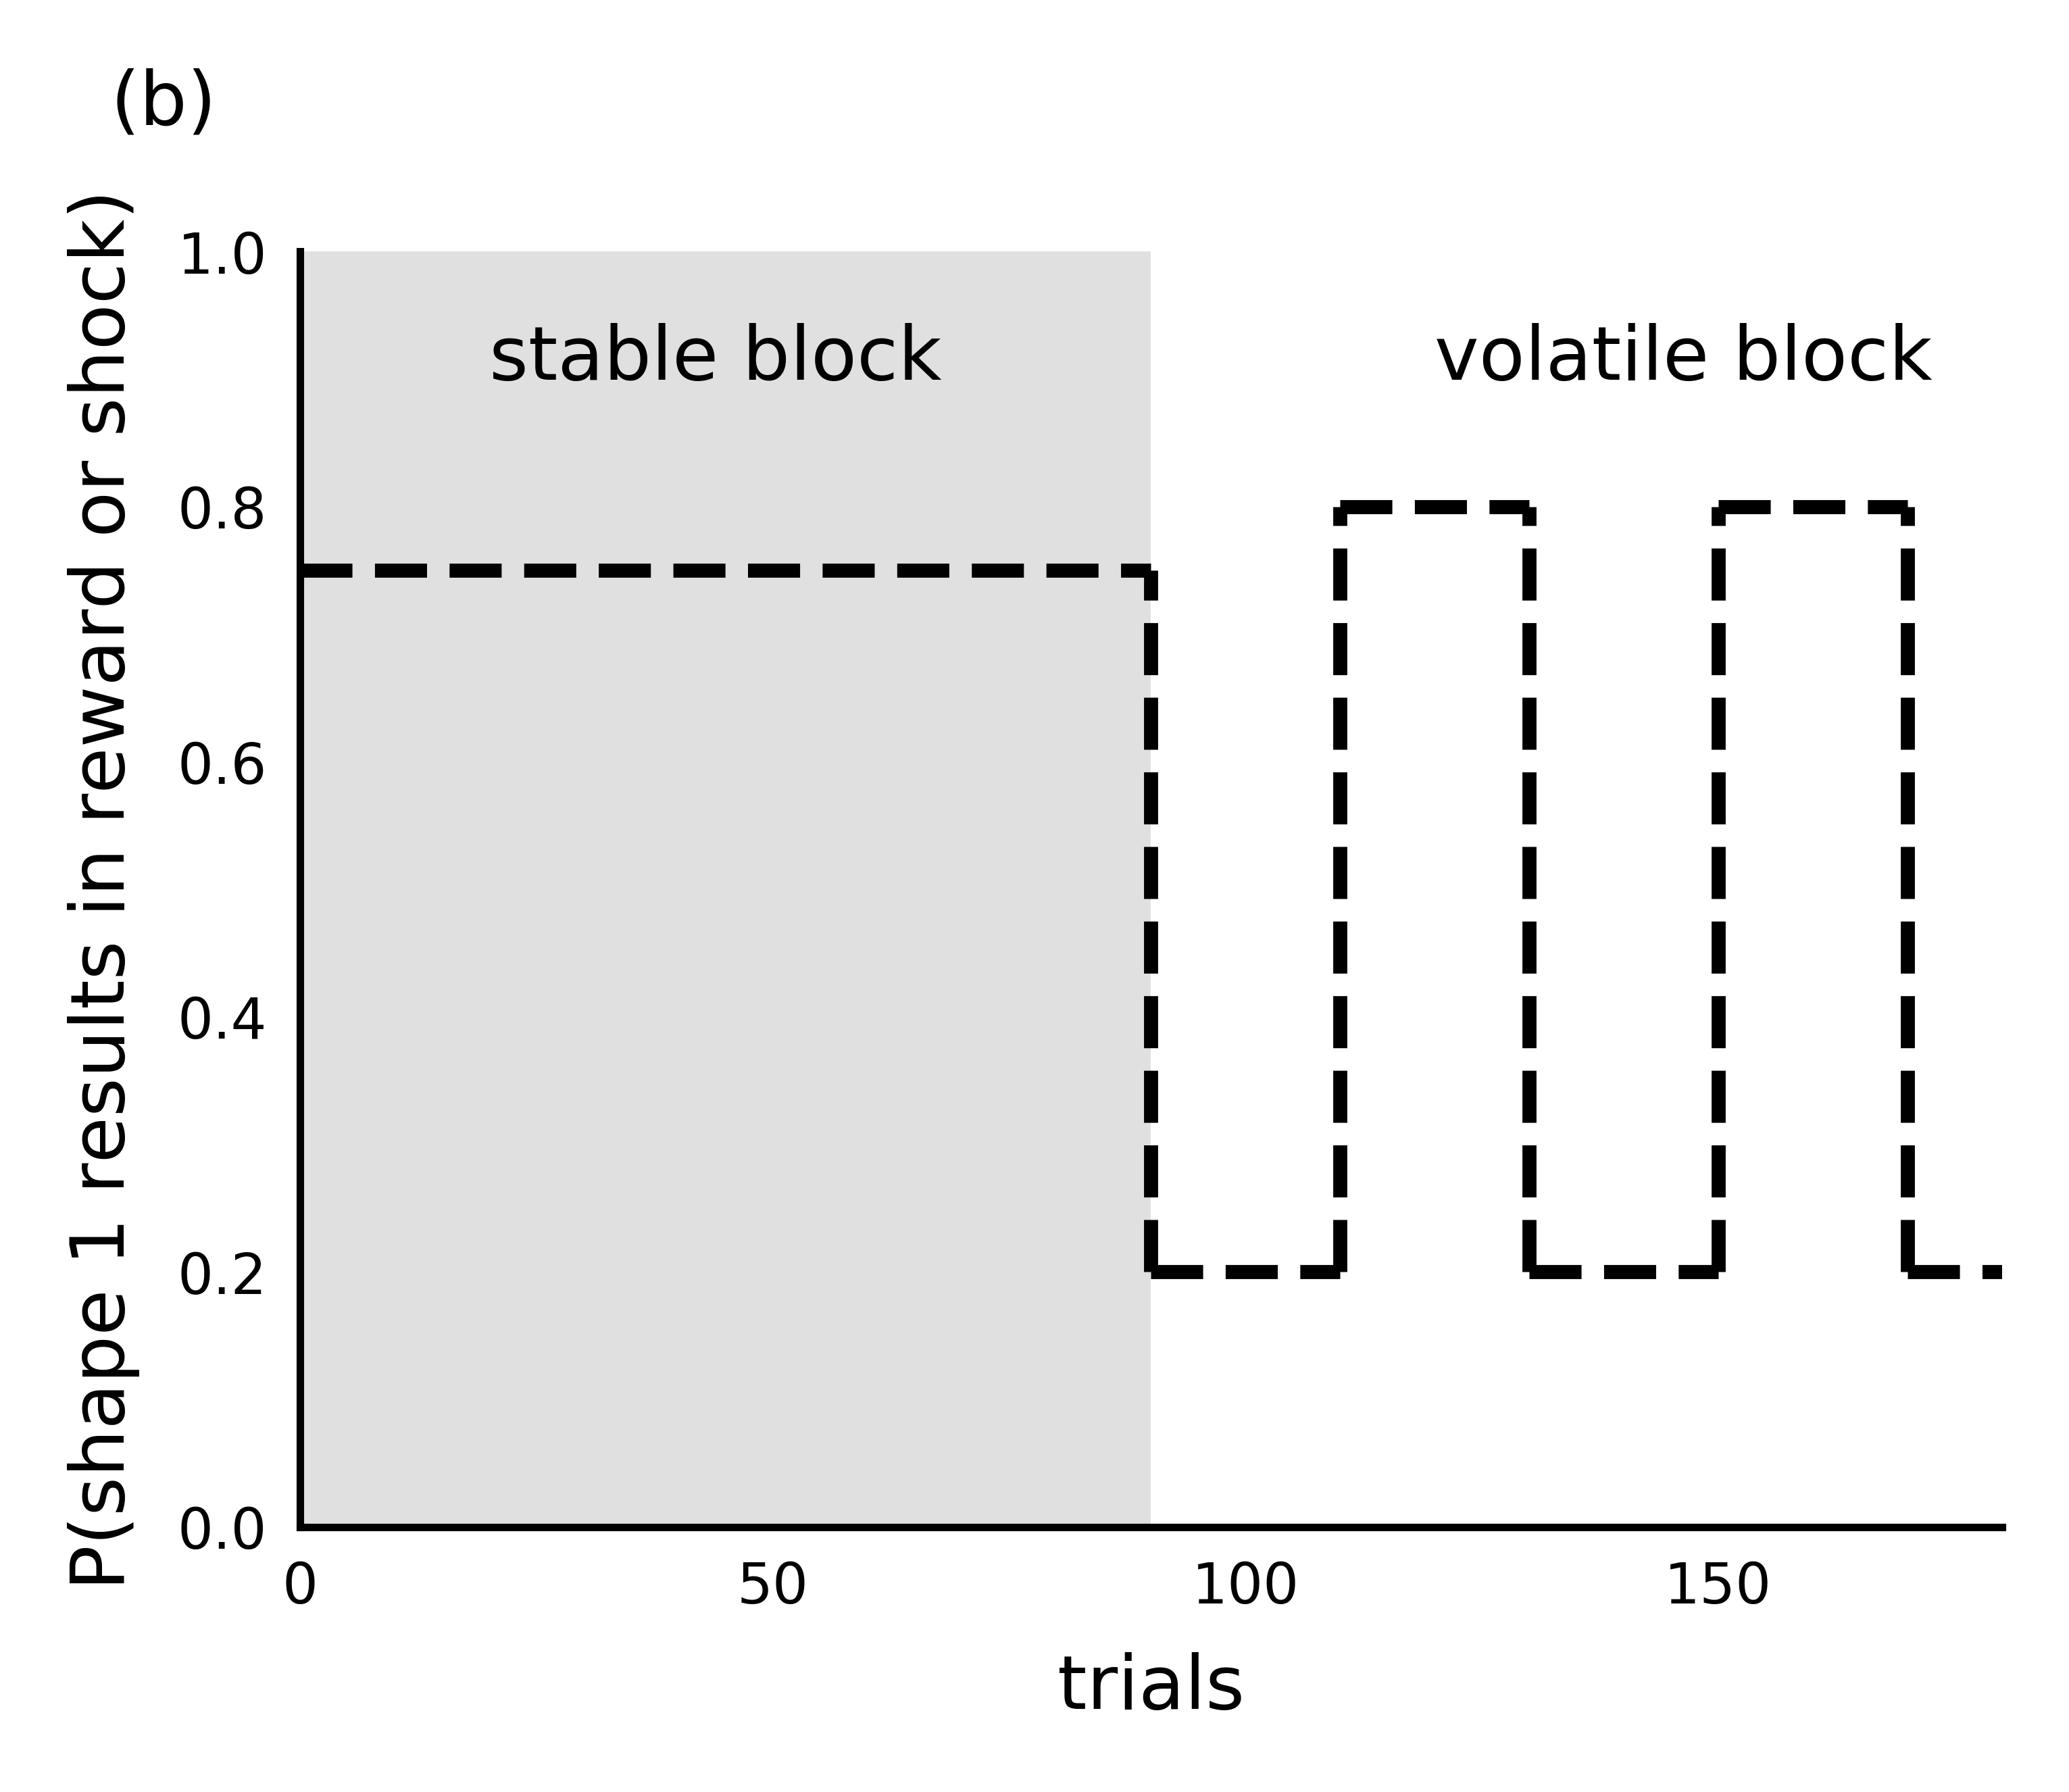

In [31]:
plt.figure(figsize=(6.5/2,2.5),dpi=1000)

fontsize=8
ticklabelsize=6

#plt.subplot(1,2,2)
plt.plot([0,90],[0.75,0.75],color='k',linestyle='--')
plt.plot([90,90],[0.2,0.75],color='k',linestyle='--')
plt.plot([90,110],[0.2,0.2],color='k',linestyle='--')
plt.plot([110,110],[0.2,0.8],color='k',linestyle='--')
plt.plot([110,130],[0.8,0.8],color='k',linestyle='--')
plt.plot([130,130],[0.2,0.8],color='k',linestyle='--')
plt.plot([130,150],[0.2,0.2],color='k',linestyle='--')
plt.plot([150,150],[0.2,0.8],color='k',linestyle='--')
plt.plot([150,170],[0.8,0.8],color='k',linestyle='--')
plt.plot([170,170],[0.2,0.8],color='k',linestyle='--')
plt.plot([170,180],[0.2,0.2],color='k',linestyle='--')

sns.despine()
plt.xlabel('trials',fontsize=fontsize)
plt.xlim([0,180])
plt.xticks(fontsize=ticklabelsize)

plt.ylim([0,1])
plt.ylabel('P(shape 1 results in reward or shock)',fontsize=fontsize)
plt.yticks(fontsize=ticklabelsize)
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

plt.axvspan(0,90, facecolor='0.2', alpha=0.15)
plt.text(-20,1.1,'(b)',fontsize=8)
plt.text(20,0.9,'stable block',fontsize=fontsize)
plt.text(120,0.9,'volatile block',fontsize=fontsize)
plt.savefig('../figures/figure_2_partb.png')#,bbox_inches='tight')